In [33]:
import os
from PIL import Image
import imagehash
import shutil
import cv2

In [34]:
from matplotlib import pyplot as plt
import numpy as np

In [35]:
# Paramètres
INPUT_DIR = "../data/raw"
OUTPUT_DIR = '../data/processed'
CATEGORIES = ['acne', 'vitiligo', 'hyperpigmentation', 'nail_psoriasis', 'sjs_ten']
IMAGE_SIZE = (224, 224)
BLUR_THRESHOLD = 100

In [36]:
# Fonction pour détecter le flou
def is_blurry(image_path, threshold=BLUR_THRESHOLD):
    image = cv2.imread(image_path, 0)
    return cv2.Laplacian(image, cv2.CV_64F).var() < threshold

In [37]:
# Créer le dossier de sortie
os.makedirs(OUTPUT_DIR, exist_ok=True)

In [38]:
processed_images = 0
raw_images = 0

In [39]:
# Traitement par catégorie
for category in CATEGORIES:
    seen_hashes = set()
    input_path = os.path.join(INPUT_DIR, category)
    output_path = os.path.join(OUTPUT_DIR, category)
    os.makedirs(output_path, exist_ok=True)

    for filename in os.listdir(input_path):
        filepath = os.path.join(input_path, filename)
        raw_images += 1
        try:
            # Supprimer flou
            if is_blurry(filepath):
                continue

            # Supprimer doublons
            img = Image.open(filepath).convert('RGB')
            hash_img = imagehash.average_hash(img)
            if hash_img in seen_hashes:
                continue
            seen_hashes.add(hash_img)

            # Redimensionnement
            img = img.resize(IMAGE_SIZE)

            # Sauvegarde
            new_filename = os.path.join(output_path, filename)
            img.save(new_filename)
            processed_images += 1
            
            # Afficher le progrès
            print(f"Traitement de {filename} : {processed_images}/{raw_images} images traitées", end='\r')

        except Exception as e:
            print(f"Erreur avec {filepath}: {e}")


In [ ]:
# Résumé
print("\nTraitement terminé.")
print(f"Images bruyantes supprimées : {raw_images - processed_images}")
print(f"Images traitées : {processed_images}")
print(f"Images restantes : {raw_images}")

# Supprimer les dossiers vides
for category in CATEGORIES:
    output_path = os.path.join(OUTPUT_DIR, category)
    if not os.listdir(output_path):
        shutil.rmtree(output_path)
        print(f"Dossier vide supprimé : {output_path}")


Traitement terminé.
Images bruyantes supprimées : 3172
Images traitées : 6230
Images restantes : 9402


In [ ]:
# Visualisation des images traitées Plot
def plot_images_from_folder(folder_path, num_images=5):
    images = []
    for filename in os.listdir(folder_path)[:num_images]:
        img_path = os.path.join(folder_path, filename)
        img = Image.open(img_path)
        images.append(np.array(img))
    
    plt.figure(figsize=(15, 5))
    for i, img in enumerate(images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(img)
        plt.axis('off')
    plt.suptitle(f"Images de {os.path.basename(folder_path)}")
    plt.tight_layout()
    plt.show()

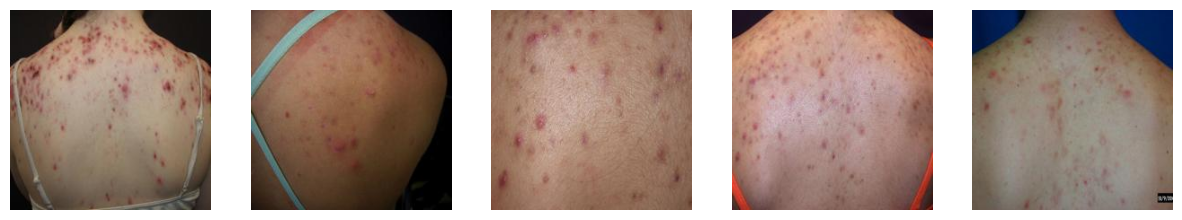

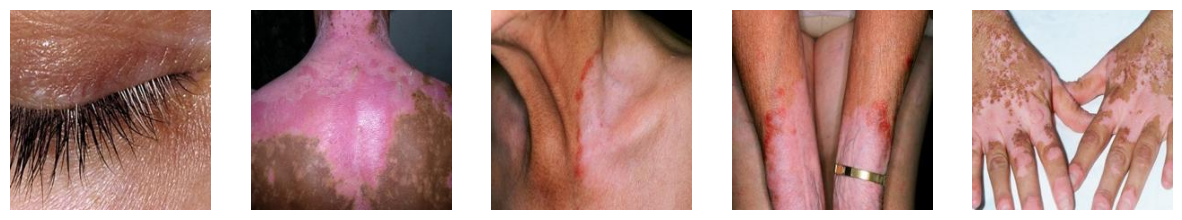

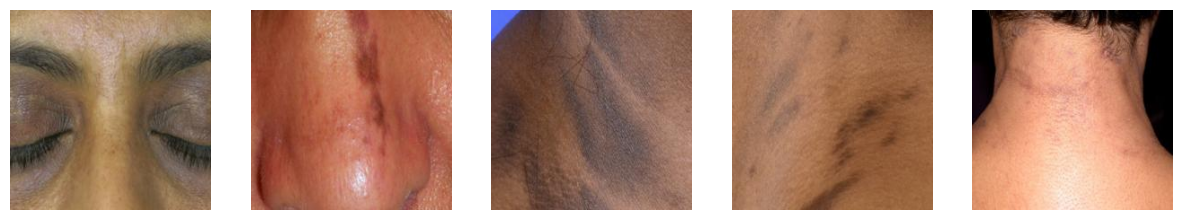

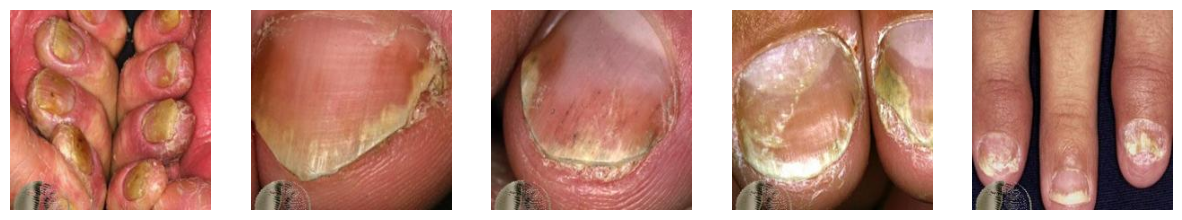

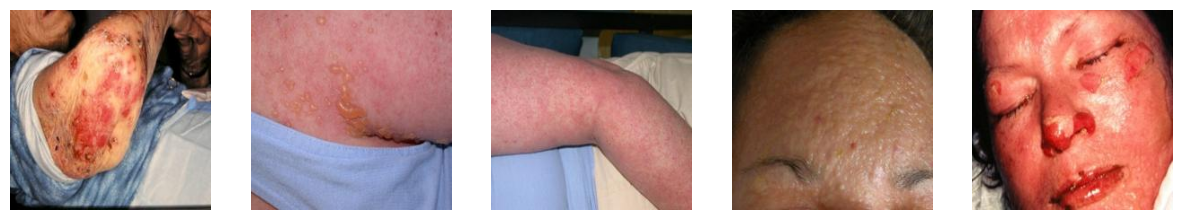

In [45]:
plot_images_from_folder(os.path.join(OUTPUT_DIR, CATEGORIES[0]), num_images=5)
plot_images_from_folder(os.path.join(OUTPUT_DIR, CATEGORIES[1]), num_images=5)
plot_images_from_folder(os.path.join(OUTPUT_DIR, CATEGORIES[2]), num_images=5)
plot_images_from_folder(os.path.join(OUTPUT_DIR, CATEGORIES[3]), num_images=5)
plot_images_from_folder(os.path.join(OUTPUT_DIR, CATEGORIES[4]), num_images=5)

# Afficher un échantillon d'images traitées 